<a href="https://colab.research.google.com/github/LH-1169213/ML/blob/main/TC4033_Activity1b_ID_Team_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

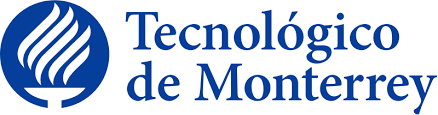

#**Master in Applied Artificial Intelligence**
##**Course: Advanced Machine Learning Methods**
###**Tecnológico de Monterrey**
###**Professor: José Antonio Cantoral Ceballos**

## **Activity 1a: Implementing a Multilayer Fully Connected Network Using Numpy**

###**Team 5:**

###**A01748750 - Evelyn Aylin Rendón Medina**
###**A01002111 - Luis Salvador Cruz Najera**
###**A01169213 - Laura Elena Hernández Mata**
###**A01793052 - Juan Carlos Lopez Cruz**

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


### Content import and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libraries to be used

In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


Datasets path

In [ ]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = '/content/drive/MyDrive/11_AMLM/Modulo 1/Actividad 1b/asl_data'
#DATA_PATH = '/content/drive/MyDrive/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

Data set sample

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Import Images

In [ ]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

### Split data

In this section the data will be split into test, train, and validation. The first cell of code is the definition of the function that will allow data to be shuffled, it verifies data is within range, and finally splits the data.

In [ ]:
# Function definition to split data according to ranges and index
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into valition and test.
    '''
    '''Split the validation set into validation and test sets.

    Parameters:
    x (numpy.ndarray): Features.
    y (numpy.ndarray): Labels.
    pct (float): Percentage of data to allocate for the test set (default is 0.5).
    shuffle (bool): Whether to shuffle the data before splitting (default is True).
    Returns:
    tuple: (x_val, y_val, x_test, y_test)
    '''
    # Check if pct is within a valid range
    if pct <= 0 or pct >= 1:
      raise ValueError("Percentage (pct) must be between 0 and 1 exclusive.")
    # Get the number of samples
    num_samples = len(x)

    # Shuffle the data if required
    if shuffle:
        indices = np.random.permutation(num_samples)
        x = x[indices]
        y = y[indices]

    # Calculate the split index
    split_index = int(num_samples * pct)

    # Split the data into validation and test sets
    x_val, x_test = x[:split_index], x[split_index:]
    y_val, y_test = y[:split_index], y[split_index:]

    return x_val,y_val,x_test, y_test

In [ ]:
# Split data in test and validation sets
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

The result, as expected, is that the data set is split according to the function that was previously defined. The validation data set was divided into two, where 50% is for test and 50% is for validation. As we have studied in previous courses, splitting data is relevant as data leakege is prevented, while parameters are tested. Therefore, we can compare the performance within sets to prevent over and underfitting, and guarantee that the model is trustworthy.

### Data labels with ASL alphabet letters

An image including the possible results of our code is shown in the image below. It is important to mention, that we expect to have in return one of these letters.

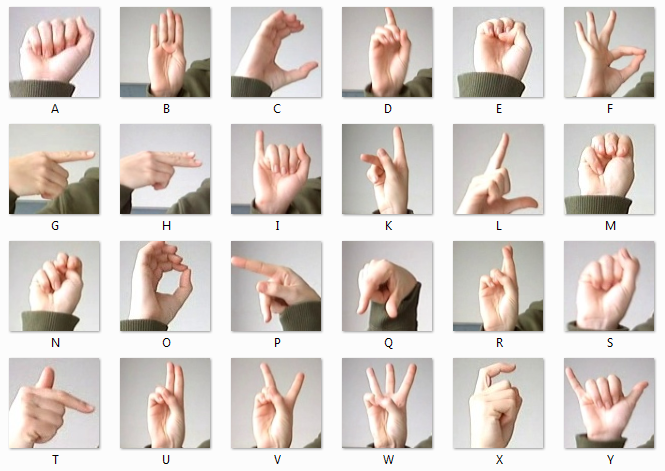

In [ ]:
### The following letters are not included, therefore removed

alphabet=list(string.ascii_uppercase)
alphabet.remove('J')  ### ASL does not have letter J
alphabet.remove('Z') ### ASL does not have letter K
print(len(alphabet))

24


In [ ]:
ylabels=dict(zip(set(y_train),alphabet)) # Dictionary creation that contains the possible output
ylabels.items() # We print the dictionary's items

dict_items([(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'K'), (10, 'L'), (11, 'M'), (12, 'N'), (13, 'O'), (14, 'P'), (15, 'Q'), (16, 'R'), (17, 'S'), (18, 'T'), (19, 'U'), (20, 'V'), (21, 'W'), (22, 'X'), (23, 'Y')])

Each letter is represented by a number, and this information is included in the dictionary. This will be used later on in the predictions as we generate the outputs.

### Normalise

In this section we will define the normalise function, which will be used to statistically normalize the data within all sets that were created before.

In [ ]:
# Function definition based on normalization math formula
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std


In [ ]:
# Statistical figures are calculated in our training set
x_mean = x_train.mean() #Calculation of mean
x_std = x_train.std() #Calculation of standard deviation

# We call the function created above to normalize the data within the three sets
x_train = normalise(x_mean, x_std, x_train) # Normalization of training set
x_val = normalise(x_mean, x_std, x_val) # Normalization of validation set
x_test = normalise(x_mean, x_std, x_test) # Normalization of test set

Once this code is ran, as we can expect, our data is normalized within the statistical ranges previously defined.

### Graphs and samples

In this section we will show the original image that represents the result generated with our code. It is expected that the image matches the prediction.

In [ ]:
# Function definition to print image
## this function considers the image size and the color
def plot_asl(image):
    plt.figure(figsize=(4,4)) # Image size
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray')) # Color of the image
    plt.axis('off') # The axis is set as off
    plt.show() # The function prints the image

The image shows a letter: T


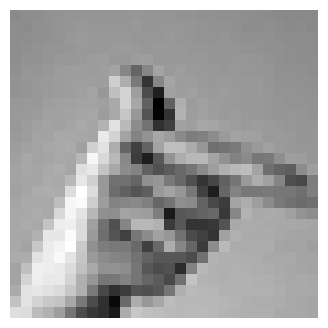

In [ ]:
# A random value is set from the test set to compare the result of the model with the image
rnd_idx = np.random.randint(len(y_test)) # Random value is generated
print(f'The image shows a letter: {ylabels.get(y_test[rnd_idx])}') # Text that includes the label and description
plot_asl(x_test[rnd_idx,:].reshape(28,28)) # The funcion is called and it prints the image

We ran the code multiple times to assess the accuracy in terms of what the model was predicting and the image that is shown. We understand that the model could not always have a perfect association or result. Therefore, we include an image of one of the results that we had in one of the iterations. However, we trust that the model performance is trustworthy as it will be explained below.

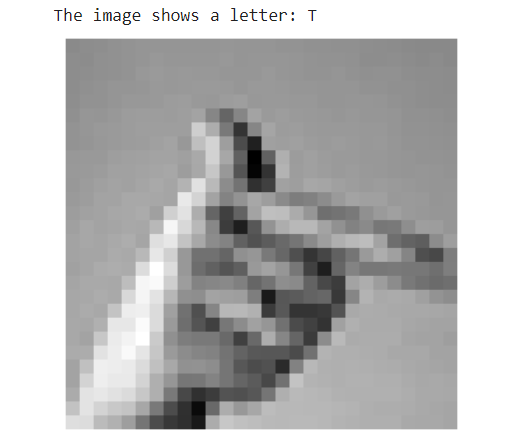


### Formulas to consider for the model


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Additional functions

#### Mini batches

In this section we will define the function to create the mini-batches that will be used afterwards. We have activated the shuffle characteristic to guarantee that the model has a better performance, as every value will be evaluated in the model with no specific sequence nor order.

In [ ]:
# Mini batch function definition

def create_minibatches(mb_size, x, y, shuffle = True): # We set the functionality of shuffle as true
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras' # The dimension is the same in X and in Y
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data) # All data is included in the np arrange
        np.random.shuffle(idxs)
        x = x[idxs] # Random index for X
        y = y[idxs] # Random index for Y
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size)) #Result of the function

We understand that the mini-batch will change as the function is called repeatedly as the data will be shuffled within the np arrange.  

## Nuestra clase Linear, ReLU y Sequential

In this section we will define the classes for Linear, ReLU and Sequential needed for the model.

In [ ]:
# We convert the np array into a PyTorch array, which a multidimentional array.
class np_tensor(np.ndarray): pass

###  Clase Linear

In this section, we define the functions for the linear model.

In [ ]:
# For linear class, we define the functions needed.
class Linear():
    def __init__(self, input_size, output_size): # Inputs required to call the function
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor) # Sinaptic weight
        self.b = (np.zeros((output_size, 1))).view(np_tensor) # bias vector
    def __call__(self, X): # Linear class forward
        Z = self.W @ X + self.b # Linear class math function
        return Z
    def backward(self, X, Z): # Gradients
        X.grad = self.W.T @ Z.grad # Math formula
        self.W.grad = Z.grad @ X.T # Gradient for sinaptic weight
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True) # Gradient for bias vector

The linear model is defined as a math function. The expression used is: *Z = WX + b* as was explained in the course content.

### Clase ReLU

In this section, we define the functions for Rectified Lineal Unit

In [ ]:
# For this class, we define its functions.
class ReLU():
    def __call__(self, Z): # Definition of the elements to call the function
        return np.maximum(0, Z)
    def backward(self, Z, A): # Definition of the maximum value up to the linear value obtained above
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

This is one of the most frequently used functions for neural networks as a trigger for the model. It learns directly from the data set.

### Clase Sequential

In this section we will create the class with its functions for the Sequential Layer.

In [ ]:
# Definition of the functions needed for the Class of Sequential Layer
class Sequential_layers():
    def __init__(self, layers): # Funtion that defines the inputs needed to call the function
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers # List that contains predecesor layers
        self.x = None # Variable is created empty
        self.outputs = {} # The output is a dictionary that is empty
    def __call__(self, X):
        self.x = X # A value is assigned to the previously empty variable
        self.outputs['l0'] = self.x # The previously emplty list is fed with the results
        for i, layer in enumerate(self.layers, 1): # We create a loop that starts in "i" until the resulting number of layers
            self.x = layer(self.x) # Dynamic value that corresponds to the layer
            self.outputs['l'+str(i)]=self.x # Dynamic value of i
        return self.x # Returns to x when the value has been updated through the loop
    def backward(self): # Function is defined
        for i in reversed(range(len(self.layers))): # Loop that establishes the range that comes from the lenght of the quantity of layers
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)]) # Dynamic value for the layers
    def update(self, learning_rate = 1e-3): # Definition of the function for the learning rate
        for layer in self.layers: # Loop that covers every layer
            if isinstance(layer, ReLU): continue # Conditional to modify W and b based on the learning rate and gradients
            layer.W = layer.W - learning_rate * layer.W.grad # Calculations for W
            layer.b = layer.b - learning_rate * layer.b.grad # Calculations for b
    def predict(self, X): # Definition of the function that predicts within the model
        return np.argmax(self.__call__(X)) # Output of the predition

This one of the final steps in the model. The predecesors are the Linear and ReLU. It is important to add multiple layers to obtain a better result.

### Cost Function

This function has the intention to calculate the cost function, which value is expected to be low. If the value of this function is high it can be associated with a low performance in the model.

In [ ]:
# Definition of the function for the calculation of the cost in the output layer
def softmaxXEntropy(x, y): # Calculation based on SoftMax
    batch_size = x.shape[1] # Batch size is established
    exp_scores = np.exp(x) # Exponential value of X
    probs = exp_scores / exp_scores.sum(axis = 0) # Proportion within a total is calculated
    preds = probs.copy() # Copy of proportions
    # Cost calculation
    y_hat = probs[y.squeeze(), np.arange(batch_size)] # Value of prediction
    cost = np.sum(-np.log(y_hat)) / batch_size # Cost definition
    # Gradient calculation
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy() # Copy of calculated proportion

    return preds, cost # Output values where we will compare prediction and cost value

This is a function that is triggered in the output layer that a neural network uses to classify for multi-classes problems. As it was explained above, the relationship between the result of the cost function and the performance is inderctly in proportion. In this sense, if the cost function is low, the perfomance is high.



### Training loop and Accuracy calculation

In this section we will define the functions for our training loop, and the calculation of the KPI that will be used to assess the performance of the model.

In [ ]:
# Definiton of the training loop function
def train(model, epochs, mb_size=128, learning_rate = 1e-3): # Inputs to call the function
    for epoch in range(epochs): # Loop that defines the range
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)): # Loop with three dynamic variables that are included within the mini-batches range of the training set.
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y) #SoftMax function is called
            model.backward()
            model.update(learning_rate) # Update of the learning rate based on the gradient
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}') # Printing of the function

In [ ]:
# Definiton of the accuracy function
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)): # Loop with three dynamic variables
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze()) # Incremental value based on the values calculated in the loop
        total += pred.shape[1] # Incremental value based on the values calculated in the loop
    return correct/total # Result of the function

The training loop and accuracy will be used with training and test sets to evaluate the data. We will compare the accuracy of both sets to understand how the model is performing.

### Create your model and train it

In this section we include the model we have created that uses the functions defined in the previous sections. As we can see, layers that are used are sequential and include Linear and ReLU.

In [ ]:
# Model that uses the functions previously defined
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)])
mb_size = 512
learning_rate = 1e-4
epochs = 20
# Hyperparameters were defined after several iterations and the best results were applied

In [ ]:
# Model training and calculation of cost and accuracy
train(model, epochs, mb_size, learning_rate)

costo: 1.1883091832244141, accuracy: 0.5998326826547685
costo: 0.5910131003868888, accuracy: 0.6946458449525934
costo: 0.3577928786193413, accuracy: 0.7289459007250418
costo: 0.22192890171621932, accuracy: 0.743446737311768
costo: 0.15453028104302183, accuracy: 0.7576687116564417
costo: 0.10126882906220165, accuracy: 0.7660345789180145
costo: 0.07678638124509156, accuracy: 0.77356385945343
costo: 0.06475746902924716, accuracy: 0.7777467930842163
costo: 0.054827101162966435, accuracy: 0.7738427216954824
costo: 0.041259114134045836, accuracy: 0.7741215839375348
costo: 0.038063533189128106, accuracy: 0.7774679308421639
costo: 0.034482945253072154, accuracy: 0.7769102063580591
costo: 0.03160781165957245, accuracy: 0.7769102063580591
costo: 0.0267505130349531, accuracy: 0.7791411042944786
costo: 0.02322997102077286, accuracy: 0.7799776910206359
costo: 0.020876236479351835, accuracy: 0.7780256553262688
costo: 0.02114133598385059, accuracy: 0.7810931399888456
costo: 0.019038712138184283, accu

With the selected hyperparameters we were able to achieve an accuracy above 75% as was required in the instructions for this activity. The result of the model execution is 78.16% as shown in the image below. We understand that everytime we run the model the results may be slightly different. However, within each execution the result was always successful.

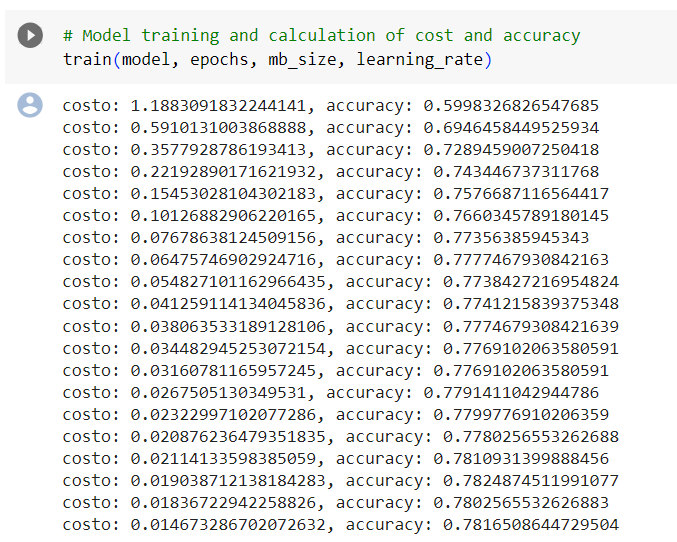

### Test your model on Random data from your test set

In this section we will test our model with random data from the original test set. The intention is to overview the performance of the model with data that is unknown. Therefore, our objective is to make sure that it is not over nor underfitting.

In [ ]:
# With this line we print the performance with the test data set
print(accuracy(x_test, y_test, mb_size))

0.7802565532626883


We know that the model it is not overfitting nor underfitting as the accuracy in test is within the same range from the training set. Additionally, the activity required a minimum of 75% of accuracy, and we have obtained 78.1% for both the training and test sets. As far as we understand this KPI, we could conclude that almost 8 out of every 10 predictions will be correct.

And example of the result is shown in the next image:

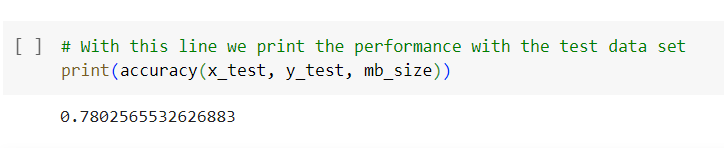

In the next line we will show an example of the prediction using test set

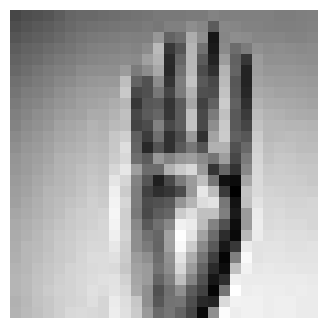

Predicted letter is: B, Real letter is:B


In [ ]:
# We will obtain a random output with these lines
idx = np.random.randint(len(y_test)) # A random index is selected
plot_asl(x_test[idx].reshape(28,28)) # The random index is used to graphically show the output
pred = model.predict(x_test[idx].reshape(-1, 1)) # The model predicts the output
print(f'Predicted letter is: {ylabels.get(pred)}, Real letter is:{ylabels.get(y_test[idx])}') # We print the result based on the index

As we can see from the result above, the prediction matches the image shown. Moreover, in every execution of the model that we made, we could see that this happened every time. We understand that the results may vary within every execution, therefore we will show an example in the next image. As it was explained before, naturally the model is not perfect so it could show an incorrect prediction at certain point.

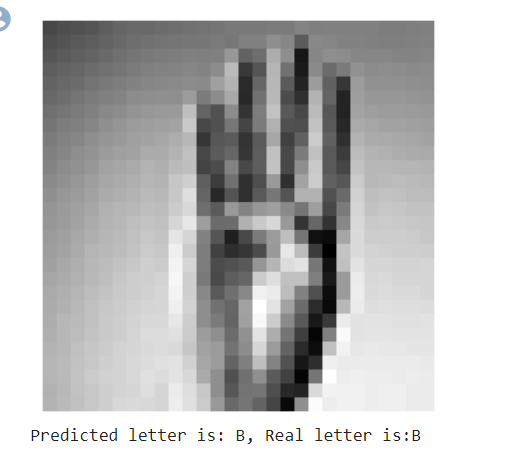

We include the next image as we did in the beginning of this code to show how the letter predicted corresponds to the image of the example of one of the executions.



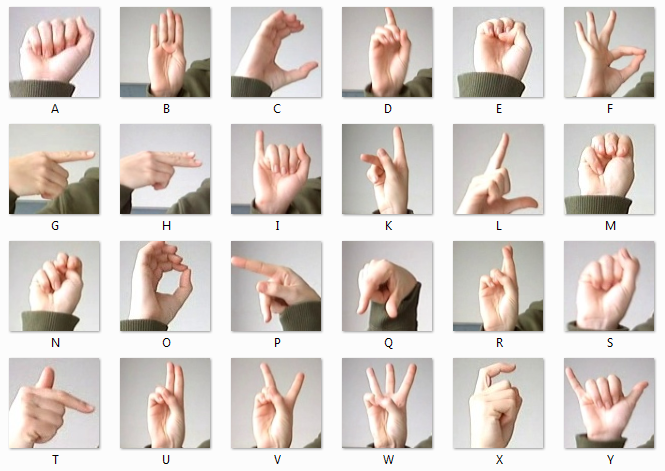

In [ ]:
# We compare the dictionary with the possible outcomes
ylabels=dict(zip(set(y_train),alphabet))
ylabels.items()

dict_items([(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'K'), (10, 'L'), (11, 'M'), (12, 'N'), (13, 'O'), (14, 'P'), (15, 'Q'), (16, 'R'), (17, 'S'), (18, 'T'), (19, 'U'), (20, 'V'), (21, 'W'), (22, 'X'), (23, 'Y')])

### **Conclusions:**

We consider that it is very important to mention that for classification problems it is essential to create multiple sequential layers in a neural network. This will provide the model with the information needed for it to learn from the data set. Thereafter, this will enable the model to understand the characteristics that define the required outputs for both the prediction and classification. A greater number of less complex sequential layers implies that the model discovers step by step the characteristics that define an output. This usually produces better performance in the model. Likewise, gradient descent is a way to optimize training; since it indicates the direction and learning rate. It should be noted that the ascending gradient is based on differential calculus.That is, the hyperparameters will be updated considering the value of the gradient, which seeks to minimize the cost function. Explained more explicitly, it updates the value of W, which is our synaptic weight matrix, associated with the neural network, the step size, and direction.

Additionally, the hyperparameters definition is relevant as they will define the way in which the model learns and behaves. Regarding the hyperparameter selection, we would like to add that Softmax generates the probability that the model output belongs to a certain particular class. This definition is most likely a dry test in many cases, but the calculation of KPIs such as cost and accuracy leads to a better understanding of the model's performance. The cost function comes from the grouping of individual losses. The higher it is, the less certain it will be of the result. Otherwise, without these calculations it would be almost impossible to assess the quality of the predictions and classification outputs. Moreover, the comparison between the Accuracy result of the training and test sets is crucial to avoid under and overfitting.

The model achieved an accuracy of around 78.02%, which is a good starting point. The cost decreased over the epochs, which indicates that the model was learning and improving its predictions over time. The chosen hyperparameters (batch_size = 512, learning_rate = 1e-4, epochs = 20) proved to be effective in providing a balance between computational efficiency and model performance. This initial choice has laid a robust foundation for future exploration and tuning. Implementing a multilayer fully connected network showcased its capability to handle image classification tasks. Despite the simplicity, the model was able to understand underlying patterns in the ASL dataset, which is promising. The ASL dataset, with its rich and diverse collection of images (87,000 images spanning 29 classes), has offered a comprehensive environment for the model to learn from. The granularity and diversity within the dataset have aided in making the model more robust and generalizable to unseen data.

Finally, the experience gathered from this exercise acts as a good starting point towards more complex and sophisticated models. Future projects could focus on fine-tuning the existing model, employing more advanced neural network architectures, and expanding the dataset or using data augmentation techniques to further enhance the model's performance and robustness. We think that this activity complemented very well the 1a and the theory studied within the first weeks of this course. This is because we were able to put into practice our knowledge and understand the theory behind neural networks. It was also enriching as we were able to go through coding and enhancing this competence.


### **References:**

https://www.kaggle.com/grassknoted/aslalphabet, &amp; Akash Nagaraj. (2018). <i>ASL Alphabet</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/29550

Rumelhart, D., Hinton, G. & Williams, R. (1986). Learning representations by back-propagating errors. Institute for Cognitive Science.

Glorot, X., Bordes, A.& Bengio, Y. (2011). Deep Sparse Rectifier Neural Networks.

Raschka, S., Liu, Y. (., Mirjalili, V., Dzhulgakov, D. (2022). Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python. United Kingdom: Packt Publishing.